In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LFS_Data_13Feb.csv')

In [3]:
df.shape

(153080, 18)

In [4]:
df.dtypes

year              int64
reg               int64
reg_name         object
cwt               int64
cwt_name         object
gpp               int64
members           int64
sex               int64
sex2             object
age               int64
marital           int64
years_of_edu      int64
occup             int64
status            int64
main_hr           int64
wage_type         int64
weight          float64
approx            int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153080 entries, 0 to 153079
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          153080 non-null  int64  
 1   reg           153080 non-null  int64  
 2   reg_name      153080 non-null  object 
 3   cwt           153080 non-null  int64  
 4   cwt_name      153080 non-null  object 
 5   gpp           153080 non-null  int64  
 6   members       153080 non-null  int64  
 7   sex           153080 non-null  int64  
 8   sex2          153080 non-null  object 
 9   age           153080 non-null  int64  
 10  marital       153080 non-null  int64  
 11  years_of_edu  153080 non-null  int64  
 12  occup         153080 non-null  int64  
 13  status        153080 non-null  int64  
 14  main_hr       153080 non-null  int64  
 15  wage_type     153080 non-null  int64  
 16  weight        153080 non-null  float64
 17  approx        153080 non-null  int64  
dtypes: f

In [6]:
df.head(10)

,year,reg,reg_name,cwt,cwt_name,gpp,members,sex,sex2,age,marital,years_of_edu,occup,status,main_hr,wage_type,weight,approx
0,2013,2,Central,27,Sa Kaeo,60502,1,1,Male,59,2,12,12,5,35,4,85.4958,99970
1,2013,2,Central,13,Pathum Thani,226173,5,1,Male,52,2,3,54,6,70,2,423.2613,99000
2,2013,2,Central,12,Nonthaburi,174854,4,1,Male,55,2,16,21,5,35,4,480.9394,98000
3,2013,3,Northern,54,Phrae,60093,4,1,Male,59,2,18,12,5,24,4,65.5107,97000
4,2013,1,Bangkok,10,Bangkok,481118,3,2,Female,28,2,12,93,6,48,4,512.5734,96000
5,2013,4,Northeastern,38,Bueng Kan,63426,7,2,Female,32,1,16,24,4,40,4,69.2186,93000
6,2013,1,Bangkok,10,Bangkok,481118,1,1,Male,50,1,16,12,6,40,4,593.2986,90000
7,2013,1,Bangkok,10,Bangkok,481118,2,1,Male,44,2,18,24,6,40,4,471.8239,90000
8,2013,1,Bangkok,10,Bangkok,481118,2,1,Male,50,2,16,12,6,32,4,725.3956,90000
9,2013,1,Bangkok,10,Bangkok,481118,1,2,Female,35,1,20,24,6,40,4,433.4874,90000


In [7]:
convert_dict = {'year':str,
                'reg': str,
                'cwt': str,
                'sex': str,
                'marital': str,
                'occup': str,
                'status': str,
                'wage_type': str,
               }
df = df.astype(convert_dict)
print(df.dtypes)

year             object
reg              object
reg_name         object
cwt              object
cwt_name         object
gpp               int64
members           int64
sex              object
sex2             object
age               int64
marital          object
years_of_edu      int64
occup            object
status           object
main_hr           int64
wage_type        object
weight          float64
approx            int64
dtype: object


In [8]:
df = df.drop(columns=['reg', 'cwt','cwt_name','sex2'])

In [9]:
df2 = pd.get_dummies(df)
df2

,gpp,members,age,years_of_edu,main_hr,weight,approx,year_2013,year_2014,year_2015,...,status_5,status_6,status_7,wage_type_1,wage_type_2,wage_type_3,wage_type_4,wage_type_5,wage_type_6,wage_type_7
0,60502,1,59,12,35,85.4958,99970,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,226173,5,52,3,70,423.2613,99000,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,174854,4,55,16,35,480.9394,98000,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,60093,4,59,18,24,65.5107,97000,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,481118,3,28,12,48,512.5734,96000,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153075,67847,5,79,3,21,533.0802,300,0,0,1,...,0,1,0,0,0,0,0,1,0,0
153076,76669,7,41,3,56,68.4734,250,0,0,1,...,0,1,0,0,0,0,1,0,0,0
153077,57774,6,50,3,35,128.4515,240,0,0,1,...,0,1,0,0,0,0,0,1,0,0
153078,60093,1,70,3,5,72.6020,200,0,0,1,...,0,1,0,0,0,0,0,1,0,0


เงินเดือนเฉลี่ย = 12054 บาทต่อเดือน


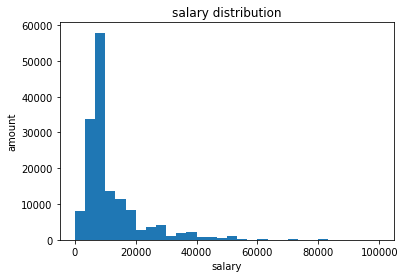

In [10]:
y = df2.loc[:, 'approx']
y
print('เงินเดือนเฉลี่ย =',round(np.mean(y)), 'บาทต่อเดือน')
plt.hist(y, bins=30)
plt.title('salary distribution')
plt.xlabel('salary')
plt.ylabel('amount')
plt.show()

อายุเฉลี่ย = 39.3 ปี


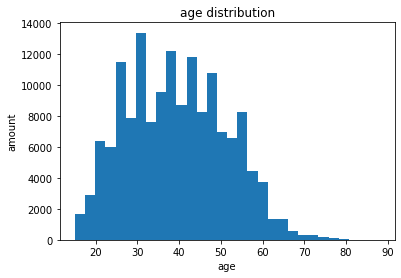

In [11]:
age = df.loc[:, 'age']

print('อายุเฉลี่ย =',round(np.mean(age),1), 'ปี')
# print(np.max(age))
# print(np.min(age))
plt.hist(age, bins=30)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('amount')
plt.show()

ชั่วโมงการทำงานเฉลี่ย = 43 ชั่วโมงต่อสัปดาห์
ชั่วโมงการทำงานเฉลี่ย = 8.6 ชั่วโมงต่อวัน


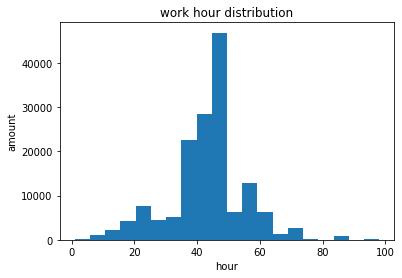

In [12]:
hr = df.loc[:, 'main_hr']

print('ชั่วโมงการทำงานเฉลี่ย =',round(np.mean(hr)), 'ชั่วโมงต่อสัปดาห์')
print('ชั่วโมงการทำงานเฉลี่ย =',round(np.mean(hr))/5, 'ชั่วโมงต่อวัน')
# print(np.max(hr))
# print(np.min(hr))
plt.hist(hr, bins=20)
plt.title('work hour distribution')
plt.xlabel('hour')
plt.ylabel('amount')
plt.show()

ปีการศึกษาเฉลี่ย = 9.5 ปี


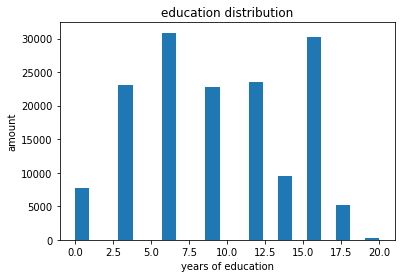

In [13]:
edu = df.loc[:, 'years_of_edu']

print('ปีการศึกษาเฉลี่ย =',round(np.mean(edu),1), 'ปี')
# print(np.max(edu))
# print(np.min(edu))
plt.hist(edu, bins=21)
plt.title('education distribution')
plt.xlabel('years of education')
plt.ylabel('amount')
plt.show()

In [11]:
Weight = df2.loc[:, 'weight']
Weight

0          85.4958
1         423.2613
2         480.9394
3          65.5107
4         512.5734
            ...   
153075    533.0802
153076     68.4734
153077    128.4515
153078     72.6020
153079    741.1099
Name: weight, Length: 153080, dtype: float64

In [12]:
X = df2.drop(['approx','weight'], axis=1)
X

,gpp,members,age,years_of_edu,main_hr,year_2013,year_2014,year_2015,reg_name_Bangkok,reg_name_Central,...,status_5,status_6,status_7,wage_type_1,wage_type_2,wage_type_3,wage_type_4,wage_type_5,wage_type_6,wage_type_7
0,60502,1,59,12,35,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,226173,5,52,3,70,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,174854,4,55,16,35,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,60093,4,59,18,24,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,481118,3,28,12,48,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153075,67847,5,79,3,21,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
153076,76669,7,41,3,56,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
153077,57774,6,50,3,35,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
153078,60093,1,70,3,5,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [13]:
X2 = sm.add_constant(X)
X2

,const,gpp,members,age,years_of_edu,main_hr,year_2013,year_2014,year_2015,reg_name_Bangkok,...,status_5,status_6,status_7,wage_type_1,wage_type_2,wage_type_3,wage_type_4,wage_type_5,wage_type_6,wage_type_7
0,1.0,60502,1,59,12,35,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1.0,226173,5,52,3,70,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1.0,174854,4,55,16,35,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.0,60093,4,59,18,24,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1.0,481118,3,28,12,48,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153075,1.0,67847,5,79,3,21,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
153076,1.0,76669,7,41,3,56,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
153077,1.0,57774,6,50,3,35,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
153078,1.0,60093,1,70,3,5,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [14]:
est = sm.WLS(y, X2, weights = Weight).fit()
est

In [15]:
# y = df2.loc[:, 'approx']
y

0         99970
1         99000
2         98000
3         97000
4         96000
          ...  
153075      300
153076      250
153077      240
153078      200
153079      200
Name: approx, Length: 153080, dtype: int64

In [16]:
predictions = est.predict(X2)
predictions

0         40789.366795
1          9562.257943
2         32886.105406
3         42735.125644
4         12958.053546
              ...     
153075     9552.134305
153076     3411.022301
153077     5792.759569
153078     7198.392231
153079     8002.090167
Length: 153080, dtype: float64

In [17]:
print(est.summary())

                            WLS Regression Results                            
Dep. Variable:                 approx   R-squared:                       0.557
Model:                            WLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     3856.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:51:35   Log-Likelihood:            -1.5991e+06
No. Observations:              153080   AIC:                         3.198e+06
Df Residuals:                  153029   BIC:                         3.199e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -124.10

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test ,Weight_train, Weight_test = train_test_split(X, y, Weight, test_size = 0.2, random_state=0)

In [47]:
y_train

120371    11700
47520      4000
7952      18000
67427     12000
85545      7500
          ...  
97639      4900
95939      5000
152315     2000
117952    12000
43567      5000
Name: approx, Length: 122464, dtype: int64

In [48]:
y_test

30986     7800
13644    12000
34529     7000
90682     6300
52956    50280
         ...  
33931     7000
79685     8040
95999     5000
82746     7800
43778     5000
Name: approx, Length: 30616, dtype: int64

In [49]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train, sample_weight = Weight_train)

LinearRegression()

In [50]:
# Predicting the Test set results
y_prediction = reg.predict(X_test)
y_prediction

array([11637.59538428, 14946.77308038,  3560.18866764, ...,
        6415.17943006,  5691.37222852, 13174.02075887])

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# R2
score = r2_score(y_test,y_prediction)
print('r2 socre =',score)
# MSE
print('mean_squared_error =',mean_squared_error(y_test,y_prediction))
# RMSE
print('root_mean_squared error =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre = 0.5701268799987735
mean_squared_error = 43612043.95776216
root_mean_squared error = 6603.941547118823


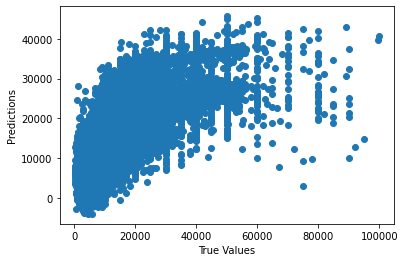

In [52]:
plt.scatter(y_test, y_prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

เงินเดือนเฉลี่ย = 11944 บาทต่อเดือน
45673.54163753685
-4011.8949221165904


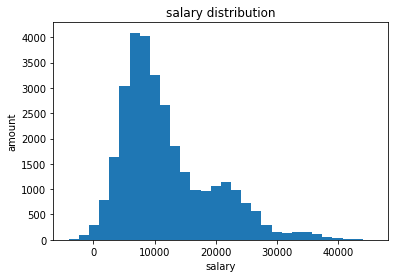

In [53]:
print('เงินเดือนเฉลี่ย =',round(np.mean(y_prediction)), 'บาทต่อเดือน')
print(np.max(y_prediction))
print(np.min(y_prediction))
plt.hist(y_prediction, bins=30)
plt.title('salary distribution')
plt.xlabel('salary')
plt.ylabel('amount')
plt.show()

0.5563076728600851
5298.2040708810155


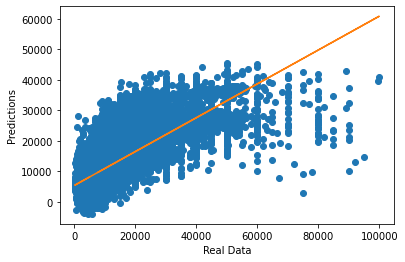

In [27]:
m, b = np.polyfit(y_test, y_prediction, 1)
print(m)
print(b)
plt.plot(y_test, y_prediction, 'o')
plt.plot(y_test, m*y_test + b)
plt.xlabel('Real Data')
plt.ylabel('Predictions')
plt.show()

In [29]:
reg.coef_
X

,gpp,members,age,years_of_edu,main_hr,year_2013,year_2014,year_2015,reg_name_Bangkok,reg_name_Central,...,status_5,status_6,status_7,wage_type_1,wage_type_2,wage_type_3,wage_type_4,wage_type_5,wage_type_6,wage_type_7
0,60502,1,59,12,35,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,226173,5,52,3,70,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,174854,4,55,16,35,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,60093,4,59,18,24,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,481118,3,28,12,48,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153075,67847,5,79,3,21,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
153076,76669,7,41,3,56,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
153077,57774,6,50,3,35,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
153078,60093,1,70,3,5,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
